## 线性回归的四大基本假设（必须满足，模型才可靠！）
- 线性关系：自变量和因变量存在线性关系
- 误差独立：残差之间不相关
- 方差齐性：残差方差相等
- 正态性：残差服从正态分布

/var/folders/4s/crpnw5s15gbchbjb65z7hqbm0000gn/T/ipykernel_34330/400495259.py:50: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4s/crpnw5s15gbchbjb65z7hqbm0000gn/T/ipykernel_34330/400495259.py:50: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4s/crpnw5s15gbchbjb65z7hqbm0000gn/T/ipykernel_34330/400495259.py:50: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4s/crpnw5s15gbchbjb65z7hqbm0000gn/T/ipykernel_34330/400495259.py:50: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4s/crpnw5s15gbchbjb65z7hqbm0000gn/T/ipykernel_34330/400495259.py:50: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4s/crpnw5s15gbchbjb65z7

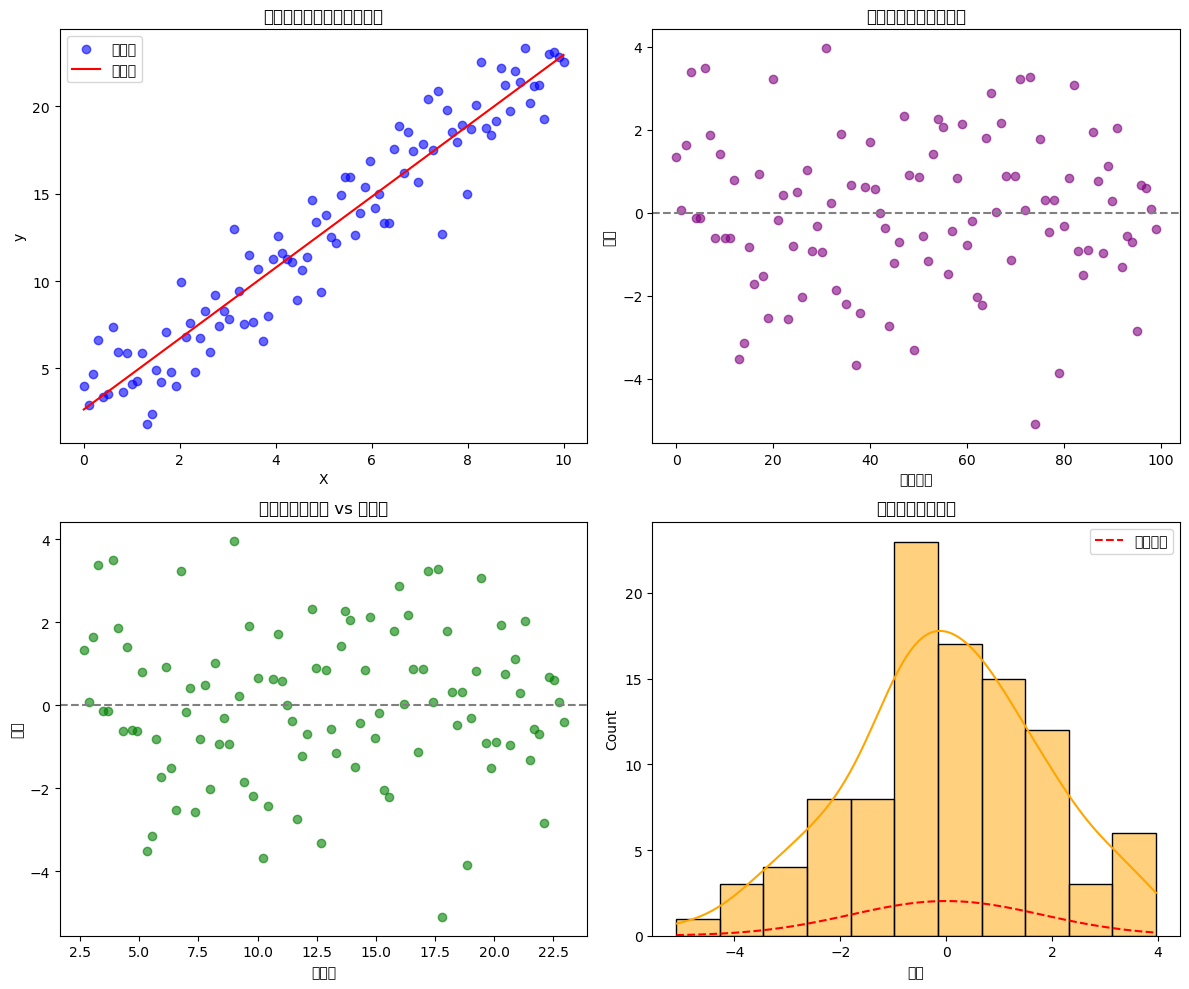

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS'

# 生成模拟数据
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 3 + np.random.normal(0, 2, 100)

# 拟合线性回归
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)
y_pred = model.predict(X.reshape(-1, 1))
residuals = y - y_pred

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. 线性关系
axes[0, 0].scatter(X, y, color='blue', alpha=0.6, label='数据点')
axes[0, 0].plot(X, y_pred, color='red', label='拟合线')
axes[0, 0].set_title('线性关系：自变量与因变量')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('y')
axes[0, 0].legend()

# 2. 误差独立
axes[0, 1].scatter(range(len(residuals)), residuals, color='purple', alpha=0.6)
axes[0, 1].axhline(0, color='gray', linestyle='--')
axes[0, 1].set_title('误差独立：残差序列图')
axes[0, 1].set_xlabel('样本序号')
axes[0, 1].set_ylabel('残差')

# 3. 方差齐性
axes[1, 0].scatter(y_pred, residuals, color='green', alpha=0.6)
axes[1, 0].axhline(0, color='gray', linestyle='--')
axes[1, 0].set_title('方差齐性：残差 vs 拟合值')
axes[1, 0].set_xlabel('拟合值')
axes[1, 0].set_ylabel('残差')

# 4. 正态性
sns.histplot(residuals, kde=True, ax=axes[1, 1], color='orange')
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm, residuals.mean(), residuals.std()) * len(residuals) * (x_norm[1]-x_norm[0]), color='red', linestyle='--', label='正态分布')
axes[1, 1].set_title('正态性：残差分布')
axes[1, 1].set_xlabel('残差')
axes[1, 1].legend()

plt.tight_layout()
plt.show()